In [1]:
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']= False

In [2]:
df = pd.read_csv('/content/energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format= True)


<ipython-input-5-1ef3c4fecdd9>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'],infer_datetime_format= True)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

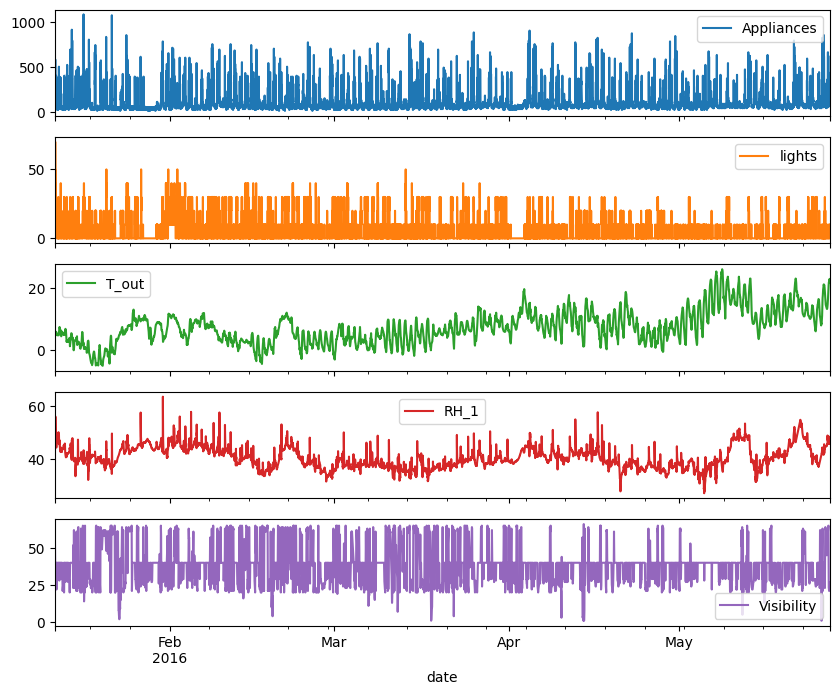

In [6]:
df.set_index('date')[['Appliances','lights','T_out','RH_1','Visibility']].plot(subplots=True)

In [7]:
df_input  =df[['Appliances','T_out','RH_1','Visibility']]

In [8]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [9]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [10]:
df_input.query("Appliances < 500")

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [11]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [12]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [13]:
features = data_scaled
target = data_scaled[:,0]


In [14]:
TimeseriesGenerator(features,target , length = 2 , sampling_rate = 1 , batch_size = 1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [15]:
X_train, X_test , Y_train,Y_test = train_test_split(features, target, test_size =0.20,random_state = 123, shuffle = False)

In [16]:
X_train.shape

(15788, 4)

In [17]:
win_length = 720
batch_size = 32
num_features = 4
train_generator =TimeseriesGenerator(X_train, Y_train,length =win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_test, Y_test,length = win_length, sampling_rate=1,batch_size= batch_size)

In [18]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length,num_features,),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 720, 64)           49408     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 720, 64)           0

In [41]:
early_stopping =  tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience = 6,
                                                   mode ='min')
model.compile(loss = tf.losses.MeanAbsoluteError(),
              optimizer=tf.optimizers.Adam(),
              metrics =[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks = [early_stopping])


Epoch 1/50


<ipython-input-41-3a4efef7722b>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50,


471/471 [==============================] - 39s 73ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 2/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 3/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 4/50
471/471 [==============================] - 32s 69ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 5/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 6/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 7/50
471/

In [42]:
model.evaluate_generator(test_generator,verbose =0)

<ipython-input-42-c6bc9e217057>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose =0)


[0.04019609093666077, 0.040196098387241364]

In [43]:
predictions = model.predict_generator (test_generator)


<ipython-input-43-26b174c71542>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator (test_generator)


In [44]:
type(predictions)

numpy.ndarray

In [45]:
predictions

array([[[0.05041078],
        [0.05041422],
        [0.05041454],
        ...,
        [0.05041968],
        [0.05042075],
        [0.05042174]],

       [[0.05040942],
        [0.05041391],
        [0.05041499],
        ...,
        [0.05042075],
        [0.05042174],
        [0.05042252]],

       [[0.05041116],
        [0.05041635],
        [0.05041764],
        ...,
        [0.05042174],
        [0.05042252],
        [0.05042288]],

       ...,

       [[0.05041457],
        [0.05042508],
        [0.05043095],
        ...,
        [0.05043895],
        [0.05043907],
        [0.0504391 ]],

       [[0.05041474],
        [0.05042547],
        [0.05043143],
        ...,
        [0.05043907],
        [0.0504391 ],
        [0.05043862]],

       [[0.0504149 ],
        [0.05042575],
        [0.05043167],
        ...,
        [0.0504391 ],
        [0.05043862],
        [0.05043754]]], dtype=float32)

In [46]:
Y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [47]:
X_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [48]:
X_test[:,1:][win_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [58]:
df_ped = pd.concat([pd.DataFrame(predictions[0]),pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [59]:
df_ped

,0,0,1,2
0,0.050411,0.453376,0.208513,0.600000
1,0.050414,0.471061,0.182827,0.600000
2,0.050415,0.488746,0.184662,0.600000
3,0.050415,0.506431,0.193996,0.600000
4,0.050415,0.524116,0.181818,0.600000
...,...,...,...,...
3222,NaN,0.891747,0.537657,0.348718
3223,NaN,0.887460,0.536006,0.361538
3224,NaN,0.883173,0.538666,0.374359
3225,NaN,0.878885,0.549491,0.387179


In [51]:
rev_trans = scaler.inverse_transform(df_ped)

In [52]:
rev_trans

array([[63.93953972,  9.1       , 34.6       , 40.        ],
       [63.94321486,  9.65      , 33.66666667, 40.        ],
       [63.94356165, 10.2       , 33.73333333, 40.        ],
       ...,
       [        nan, 22.46666667, 46.59666667, 25.33333333],
       [        nan, 22.33333333, 46.99      , 26.16666667],
       [        nan, 22.2       , 46.6       , 27.        ]])

In [53]:
df_final  = df_input[predictions.shape[0]*-1:]